In [1]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
df = pd.read_csv("ratings.csv")

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
df.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [7]:
df["movieId"].unique().shape

(45115,)

In [12]:
df["userId"].unique().shape

(270896,)

In [13]:
df.groupby("userId")

In [19]:
K = np.random.randint(1,15)

In [20]:
# generate synthetic two-dimensional data 
X, y = make_blobs(n_samples = 1000, centers=K, random_state=1) # build the clustering model 

In [21]:
X.shape

(1000, 2)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [23]:
sns.scatterplot(pd.DataFrame(X_train, columns=["x","y"]),x="x",y="y")
plt.show()

In [24]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    elbow.append(kmeans.inertia_)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

<IPython.core.display.Javascript object>


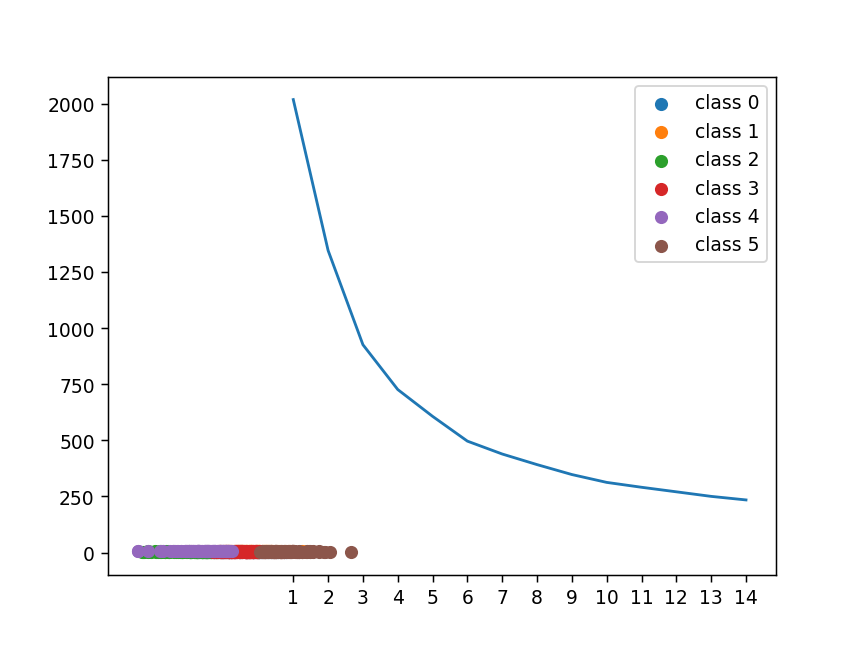

In [27]:
plt.gca()
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,14),np.arange(1,15))
plt.show()

In [28]:
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(X_train)

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=6)

In [29]:
 kmeans.predict([[1,1]])

array([0])

In [30]:
y_train_hat = kmeans.predict(X_train)

In [31]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train_hat,axis=1)]), columns=["x","y","class"])

<IPython.core.display.Javascript object>


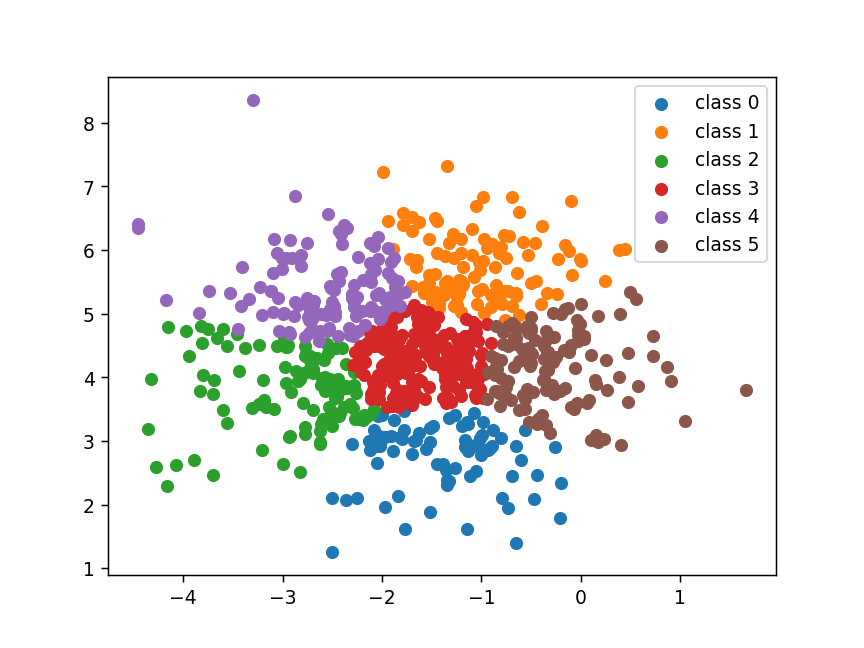

In [33]:
plt.figure()
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

<IPython.core.display.Javascript object>


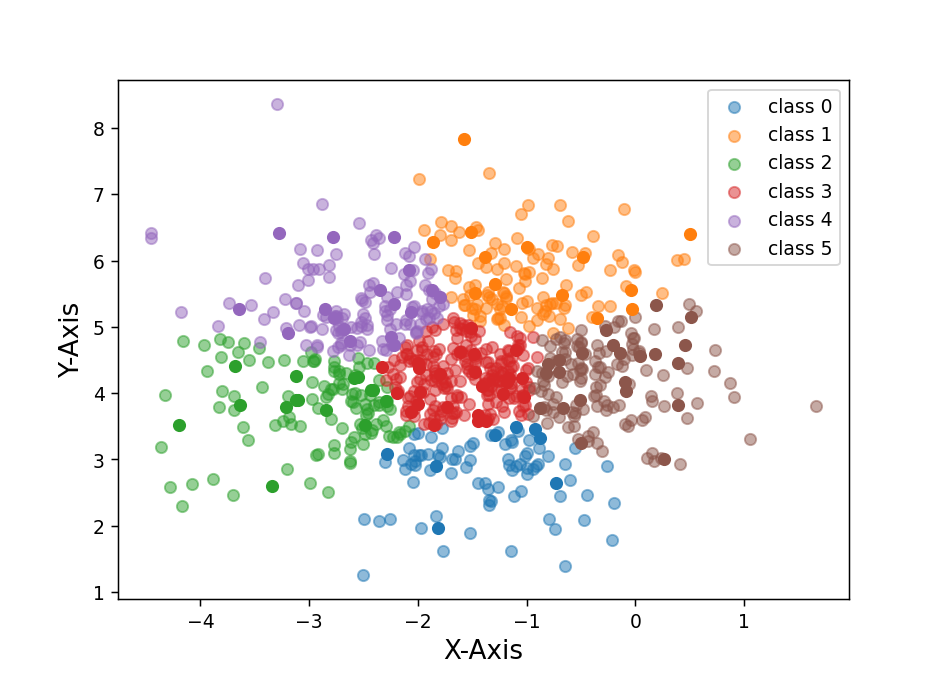

KeyboardInterrupt: 

In [34]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(7,5))
plt.ion()


for i in sorted(df_concat["class"].unique().astype(int)):
    ax.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i), alpha=0.5)


plt.xlabel("X-Axis",fontsize=14)
plt.ylabel("Y-Axis",fontsize=14)
plt.legend()

for j in X_test:

    plt.scatter(x=j[0],y=j[1], color="C{}".format(kmeans.predict(np.expand_dims(j,0))[0]))
    figure.canvas.draw()
    figure.canvas.flush_events()
    #time.sleep(0.1)
    